In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import matplotlib.cm as cm
colormap = cm.get_cmap("hsv")

C:\Users\alexk\AppData\Local\Temp\ipykernel_17032\2988994069.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


In [2]:
m100_v100_L2_s2=torch.tensor([[[1.0000e+02, 4.4151e+01, 0.0000e+00, 2.3870e+01],
         [3.6959e+01, 2.1739e+01, 7.8699e-02, 2.2130e+01],
         [8.6186e+01, 3.3117e+01, 0.0000e+00, 7.5850e+01],
         [9.9978e+01, 4.0314e+01, 0.0000e+00, 9.3990e+01],
         [9.9989e+01, 5.1813e+01, 1.7857e+00, 9.6480e+01],
         [9.9898e+01, 4.7788e+01, 1.9608e+00, 9.8810e+01],
         [9.9879e+01, 5.7746e+01, 0.0000e+00, 9.9370e+01],
         [9.9890e+01, 1.8750e+01, 0.0000e+00, 9.9530e+01],
         [9.9830e+01, 4.7059e+01, 0.0000e+00, 9.9730e+01],
         [9.9840e+01, 2.8571e+01, 0.0000e+00, 9.9780e+01]],

        [[1.0000e+02, 9.0044e+01, 3.7514e-01, 1.9430e+01],
         [5.5140e+01, 2.3575e+01, 3.5663e-01, 1.8660e+01],
         [7.7828e+01, 3.0976e+01, 1.0168e+00, 5.1920e+01],
         [9.9653e+01, 3.8272e+01, 2.9439e+00, 7.8700e+01],
         [9.9617e+01, 3.4218e+01, 3.9683e-01, 8.7220e+01],
         [9.9857e+01, 3.1455e+01, 2.3810e+00, 9.3030e+01],
         [9.9655e+01, 2.4478e+01, 0.0000e+00, 9.6040e+01],
         [9.9826e+01, 2.0430e+01, 2.2222e+00, 9.7910e+01],
         [9.9858e+01, 2.4219e+01, 0.0000e+00, 9.8640e+01],
         [9.9919e+01, 3.5593e+01, 0.0000e+00, 9.9360e+01]],

        [[1.0000e+02, 8.9278e+01, 7.9390e-01, 5.7900e+00],
         [2.9679e+01, 1.9207e+01, 6.1241e-01, 3.8100e+00],
         [4.7819e+01, 1.9520e+01, 1.0672e+00, 1.1070e+01],
         [8.9283e+01, 2.6303e+01, 9.2751e-01, 3.2420e+01],
         [9.6082e+01, 1.9808e+01, 8.6993e-01, 4.9300e+01],
         [9.6549e+01, 1.6124e+01, 5.4091e-01, 6.1600e+01],
         [9.8077e+01, 1.8050e+01, 7.5853e-01, 7.4950e+01],
         [9.8803e+01, 1.7204e+01, 2.2523e-01, 8.3280e+01],
         [9.8680e+01, 1.7053e+01, 1.4925e+00, 8.9690e+01],
         [9.9194e+01, 2.1980e+01, 1.6393e+00, 9.4700e+01]],

        [[1.0000e+02, 8.7342e+01, 9.1762e-01, 1.6400e+00],
         [3.8889e+01, 1.5566e+01, 8.2907e-01, 1.2100e+00],
         [5.0000e+01, 2.3142e+01, 1.0160e+00, 2.6100e+00],
         [4.1148e+01, 1.4634e+01, 9.6710e-01, 3.6000e+00],
         [8.0856e+01, 1.1731e+01, 1.2294e+00, 1.0130e+01],
         [8.6293e+01, 1.2450e+01, 1.0095e+00, 2.0090e+01],
         [8.6032e+01, 1.2133e+01, 1.0388e+00, 3.1780e+01],
         [8.4191e+01, 1.1104e+01, 1.1803e+00, 4.4760e+01],
         [8.6992e+01, 1.0878e+01, 1.4706e+00, 6.0190e+01],
         [9.2524e+01, 2.4438e+01, 3.7901e+00, 7.8280e+01]],

        [[0.0000e+00, 8.0000e+01, 9.0045e-01, 9.4000e-01],
         [0.0000e+00, 0.0000e+00, 9.6279e-01, 9.6000e-01],
         [1.0000e+02, 1.8056e+01, 9.7723e-01, 1.1200e+00],
         [1.6667e+01, 1.4721e+01, 9.3906e-01, 1.2200e+00],
         [7.3529e+01, 1.1321e+01, 1.1404e+00, 1.9800e+00],
         [6.9173e+01, 1.0415e+01, 1.0713e+00, 3.2600e+00],
         [6.3464e+01, 7.7350e+00, 1.2073e+00, 7.1300e+00],
         [4.5912e+01, 5.3763e+00, 1.2543e+00, 1.0560e+01],
         [4.5760e+01, 6.6320e+00, 1.3847e+00, 2.0460e+01],
         [8.1244e+01, 2.8259e+01, 8.8945e+00, 6.0550e+01]],

        [[0.0000e+00, 0.0000e+00, 8.9000e-01, 8.9000e-01],
         [0.0000e+00, 0.0000e+00, 1.0801e+00, 1.0800e+00],
         [0.0000e+00, 4.0000e+01, 7.9040e-01, 8.1000e-01],
         [0.0000e+00, 1.1111e+01, 1.0819e+00, 1.1000e+00],
         [1.0000e+02, 1.3514e+01, 8.8665e-01, 9.9000e-01],
         [1.0000e+02, 1.3757e+01, 9.3791e-01, 1.2000e+00],
         [6.0000e+01, 1.0606e+01, 9.4772e-01, 1.6100e+00],
         [2.9000e+01, 4.2294e+00, 1.0766e+00, 1.9000e+00],
         [7.4646e+00, 2.8645e+00, 1.2611e+00, 2.3700e+00],
         [1.7612e+01, 1.0334e+01, 6.1359e+00, 1.2660e+01]]])
ptr_list=torch.tensor([3.1623e+01, 1.0000e+02, 3.1623e+02, 1.0000e+03, 3.1623e+03, 1.0000e+04,
        3.1623e+04, 1.0000e+05, 3.1623e+05, 1.0000e+06], dtype=torch.float64)


m100_v100_L2_s2_test_size=torch.tensor([[[2.2700e+03, 2.6500e+02, 7.4650e+03],
         [5.6820e+03, 5.0600e+02, 3.8120e+03],
         [8.5640e+03, 6.1600e+02, 8.2000e+02],
         [9.1700e+03, 5.7300e+02, 2.5700e+02],
         [9.4460e+03, 3.8600e+02, 1.6800e+02],
         [9.8360e+03, 1.1300e+02, 5.1000e+01],
         [9.9080e+03, 7.1000e+01, 2.1000e+01],
         [9.9580e+03, 3.2000e+01, 1.0000e+01],
         [9.9820e+03, 1.7000e+01, 1.0000e+00],
         [9.9920e+03, 7.0000e+00, 1.0000e+00]],

        [[1.0990e+03, 9.0400e+02, 7.9970e+03],
         [2.5680e+03, 1.8240e+03, 5.6080e+03],
         [5.7280e+03, 2.3050e+03, 1.9670e+03],
         [7.2120e+03, 1.7010e+03, 1.0870e+03],
         [8.3650e+03, 1.1310e+03, 5.0400e+02],
         [9.1090e+03, 6.3900e+02, 2.5200e+02],
         [9.5550e+03, 3.3500e+02, 1.1000e+02],
         [9.7690e+03, 1.8600e+02, 4.5000e+01],
         [9.8470e+03, 1.2800e+02, 2.5000e+01],
         [9.9230e+03, 5.9000e+01, 1.8000e+01]],

        [[9.6000e+01, 4.5700e+02, 9.4470e+03],
         [3.7400e+02, 1.1350e+03, 8.4910e+03],
         [1.1690e+03, 2.4590e+03, 6.3720e+03],
         [2.6220e+03, 3.2810e+03, 4.0970e+03],
         [4.4660e+03, 3.1200e+03, 2.4140e+03],
         [5.9410e+03, 2.5800e+03, 1.4790e+03],
         [7.2810e+03, 1.9280e+03, 7.9100e+02],
         [8.1900e+03, 1.3660e+03, 4.4400e+02],
         [8.9370e+03, 8.6200e+02, 2.0100e+02],
         [9.4340e+03, 5.0500e+02, 6.1000e+01]],

        [[4.0000e+00, 7.9000e+01, 9.9170e+03],
         [1.8000e+01, 2.1200e+02, 9.7700e+03],
         [5.8000e+01, 5.9200e+02, 9.3500e+03],
         [2.0900e+02, 1.3120e+03, 8.4790e+03],
         [7.9400e+02, 2.4550e+03, 6.7510e+03],
         [1.8020e+03, 3.2450e+03, 4.9530e+03],
         [3.1500e+03, 3.5770e+03, 3.2730e+03],
         [4.8580e+03, 3.2780e+03, 1.8640e+03],
         [6.5880e+03, 2.5280e+03, 8.8400e+02],
         [8.0120e+03, 1.6450e+03, 3.4300e+02]],

        [[0.0000e+00, 5.0000e+00, 9.9950e+03],
         [4.0000e+00, 2.5000e+01, 9.9710e+03],
         [2.0000e+00, 7.2000e+01, 9.9260e+03],
         [6.0000e+00, 1.9700e+02, 9.7970e+03],
         [3.4000e+01, 5.8300e+02, 9.3830e+03],
         [1.3300e+02, 1.3730e+03, 8.4940e+03],
         [6.8700e+02, 2.5210e+03, 6.7920e+03],
         [1.7490e+03, 3.6270e+03, 4.6240e+03],
         [3.8440e+03, 3.8450e+03, 2.3110e+03],
         [6.3820e+03, 2.8310e+03, 7.8700e+02]],

        [[0.0000e+00, 0.0000e+00, 1.0000e+04],
         [0.0000e+00, 1.0000e+00, 9.9990e+03],
         [0.0000e+00, 5.0000e+00, 9.9950e+03],
         [0.0000e+00, 1.8000e+01, 9.9820e+03],
         [1.0000e+00, 7.4000e+01, 9.9250e+03],
         [2.0000e+00, 1.8900e+02, 9.8090e+03],
         [1.5000e+01, 5.9400e+02, 9.3910e+03],
         [1.0000e+02, 1.7260e+03, 8.1740e+03],
         [7.7700e+02, 3.9100e+03, 5.3130e+03],
         [3.9860e+03, 4.6450e+03, 1.3690e+03]]])


C:\Users\alexk\AppData\Local\Temp\ipykernel_17032\3176815544.py:8: RuntimeWarning: divide by zero encountered in log
  marker_size = np.log(m100_v100_L2_s2_test_size[j, :, i].numpy())


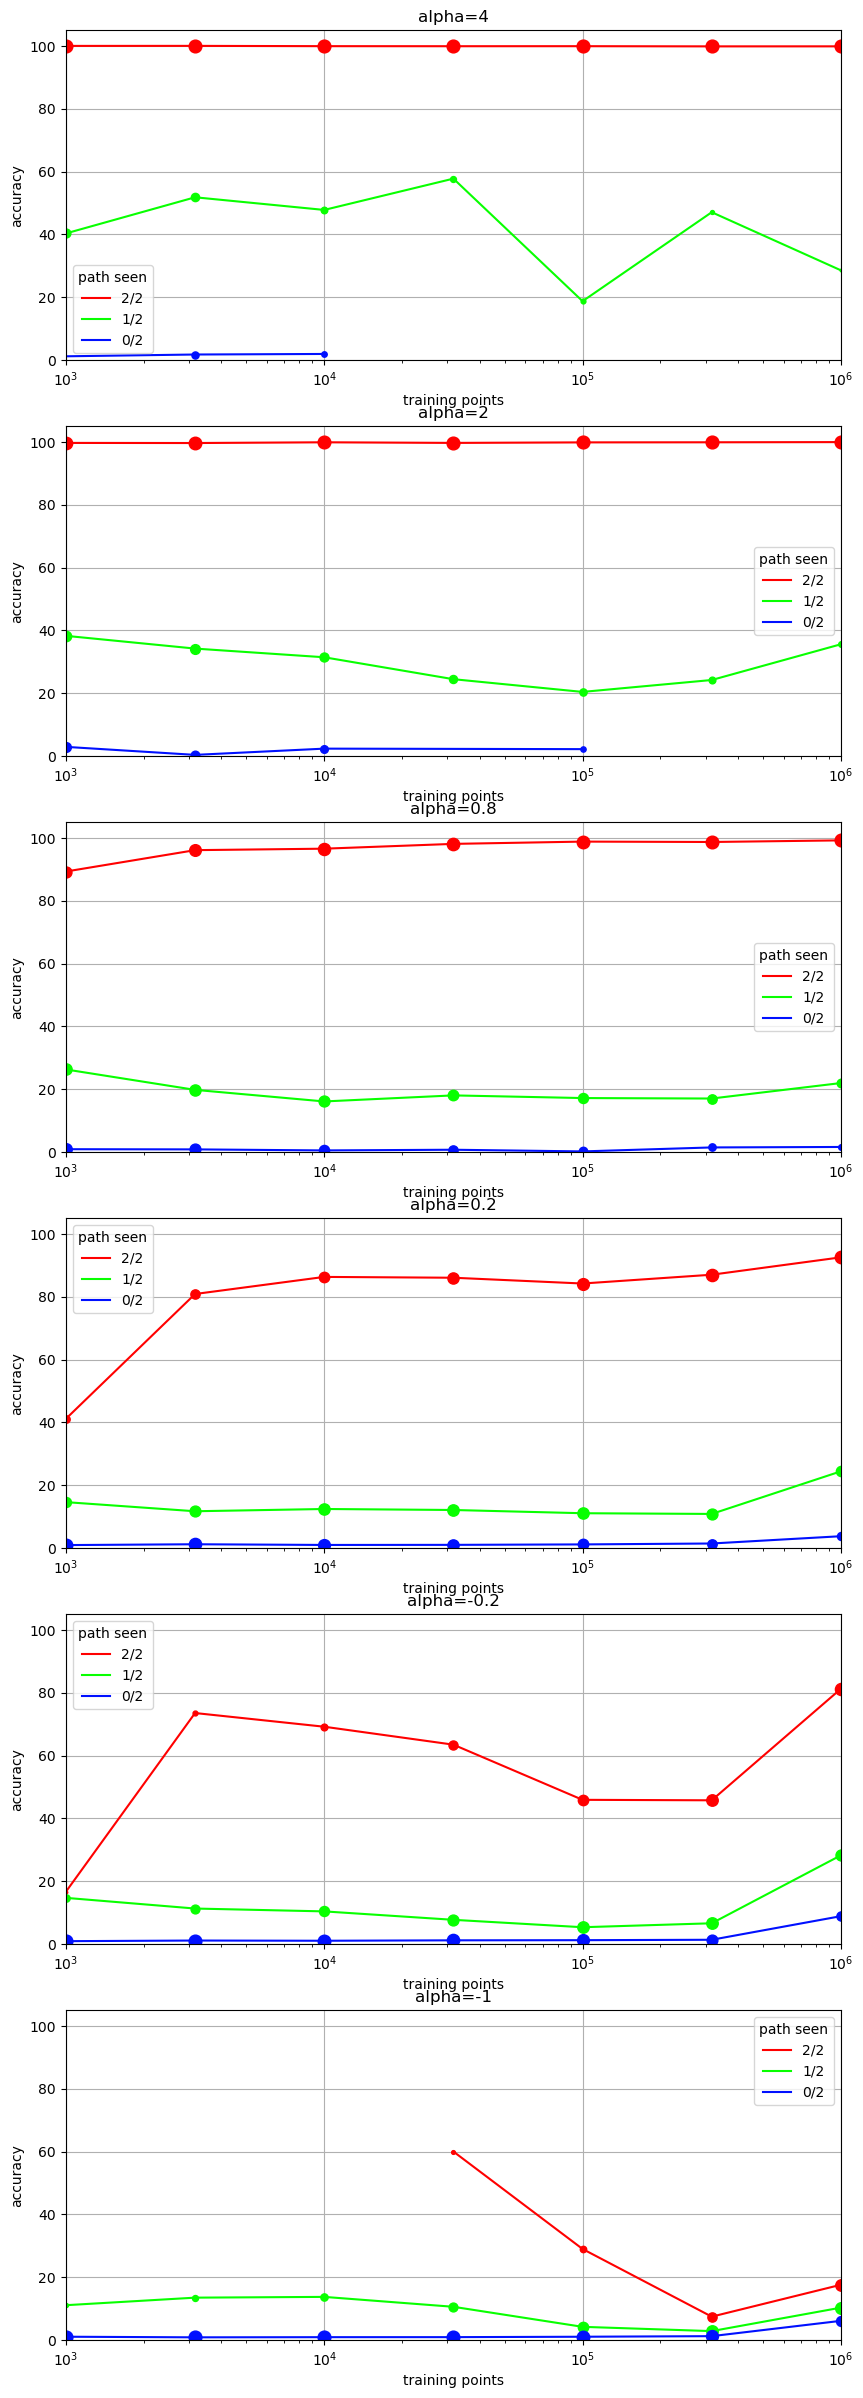

In [5]:
fig, axis = plt.subplots(6, 1, figsize=(10, 30))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
# title_list = ["4/4", "3/4", "2/4", "2/4 in same", "1/4", "0/4"]
title_list = ["2/2", "1/2", "0/2"]
for j in range(6):
    for i in range(3):
        data = m100_v100_L2_s2[j, :, i].numpy()
        marker_size = np.log(m100_v100_L2_s2_test_size[j, :, i].numpy())
        non_zero_indices = np.where(data != 0)[0]
        bigger_indices = np.where(m100_v100_L2_s2_test_size[j, :, i] > 4)[0]
        non_zero_indices = np.intersect1d(non_zero_indices, bigger_indices)
        axis[j].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(i/3),label=title_list[i])
        for idx in non_zero_indices:
            axis[j].semilogx(ptr_list[idx], data[idx], color=colormap(i/3),  markersize=marker_size[idx], marker='o')
    axis[j].set_ylim(0, 105)
    axis[j].set_xlim(10**3, 10**6)
    axis[j].set_title(f"alpha={temperature_list[j]}")
    axis[j].grid()  
    axis[j].set_xlabel("training points")
    axis[j].set_ylabel("accuracy")
    axis[j].legend(title="path seen")
    
    marker_sizes = [5, 4, 3, 2, 1]  # Marker sizes
    corresponding_values = [100, 50, 30, 20, 10]
    for size, value in zip(marker_sizes, corresponding_values):
        axis[j].scatter([], [], s=size**2, label=f'{value}', alpha=0.5)  # Marker size is squared for better visibility



    